In [1]:
from utils import GraphEdgeIterator, generate_seeds, iteration_logging
from tqdm.notebook import tqdm
import io
import pandas as pd


In [2]:
OMEGA = 10
BUFFER_COUNT = 2
PRUNE_INTERVAL = 1_000

In [9]:
edges = list(GraphEdgeIterator(buffer_count=BUFFER_COUNT))

In [36]:
wrapped_edges = tqdm(GraphEdgeIterator(
    buffer_count=BUFFER_COUNT,
    maintain_reverse_reachability=True,
    omega=OMEGA,
    prune_interval=PRUNE_INTERVAL
), total=len(edges), desc="Edges")

Edges:   0%|          | 0/2912276 [00:00<?, ?it/s]

In [37]:
csv_stream = io.StringIO()
seeds = list(iteration_logging(wrapped_edges, log_stream=csv_stream))

KeyboardInterrupt: 

In [39]:
df = pd.read_csv(csv_stream)

EmptyDataError: No columns to parse from file

In [33]:
df = df.set_index("time_seconds")

array([<Axes: xlabel='time_seconds'>, <Axes: xlabel='time_seconds'>,
       <Axes: xlabel='time_seconds'>], dtype=object)

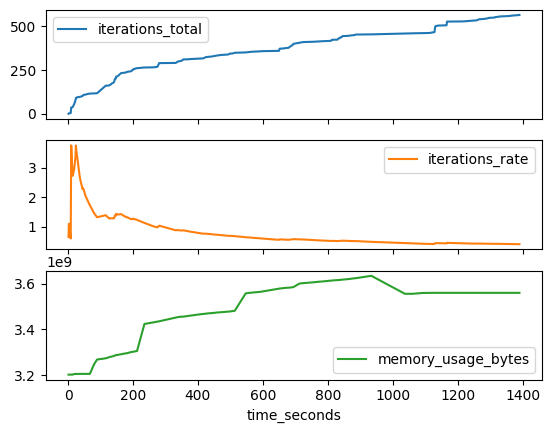

In [34]:
df.plot(subplots=True)
